# Lung Cancer Classification

Datasets:
* `yn_df`: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
* `level_df`: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

## Loading Data

In [2]:
yn_df = pd.read_csv("survey_lung_cancer.csv")
yn_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
level_df = pd.read_csv("cancer_patient_datasets.csv").drop(axis = 1, labels = "index")
level_df.head(5)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


## Cleaning Data

### Dropping Unnecessary Columns

Notes: `yn_df` columns all seem to be fine, will drop the unnecessary ones later once we have determined which characteristics we will be using in our classification.

In [4]:
level_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

Dropped `level` column from `level_df` because its meaning is unclear, not necessary.

In [5]:
level_df.drop(columns = "Level", inplace = True)
level_df.head(5)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,P1,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,P10,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,P1000,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,P101,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


### Changing Index

In the `yn_df` dataframe, there is no column that we can use as a unique identifier for patients, besides the current index, so we should not change anything there. However, in the `level_df` dataframe, the `Patient Id` column should be a unique identifier. If it is, we can set that as the index.

In [6]:
level_df["Patient Id"].is_unique

True

In [7]:
level_df_ind = level_df.set_index("Patient Id")
level_df_ind.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Patient Id,,,,,,,,,,,,,,,,,,,,,
P1,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
P10,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
P100,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
P1000,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
P101,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [8]:
type(level_df_ind)

pandas.core.frame.DataFrame

Two different dataframes: one has the original numerical indices, second one uses the unique patient ID as the index.

### Tidying Up Fields

In [9]:
yn_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
level_df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
dtype: int64

No null values in any of the rows, which is to be expected. These two CSV files were highly rated on Kaggle for usability. Can inspect rows randomly to make sure there are no random or out of place values though.

In [11]:
yn_df.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
43,M,52,2,1,1,2,1,2,2,2,2,1,2,1,2,YES
103,M,62,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
200,F,63,1,1,1,2,1,1,1,2,2,1,1,2,2,YES
92,M,52,2,1,1,1,2,2,2,2,2,1,1,2,2,YES
297,F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES


Something that can be changed to make it more usable: convert the 1's and 2's in `yn_df` to 0's and 1's to represent true or false more clearly. Although column relabeling comes later, had to do it early for these next two columns because their names were causing issues.

In [12]:
yn_df.rename(mapper = {"FATIGUE ": "FATIGUE", "ALLERGY ": "ALLERGY"}, axis = 1, inplace = True)

In [13]:
yn_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [14]:
columns_to_subtract = ["SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "FATIGUE", 
                      "ALLERGY", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH",
                      "SWALLOWING DIFFICULTY", "CHEST PAIN"]
yn_df[columns_to_subtract] = yn_df[columns_to_subtract].apply(func = lambda x: x - 1, axis = 0)
yn_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [15]:
def yn_to_bool(string):
    if string == "YES":
        return 1
    elif string == "NO":
        return 0

In [16]:
yn_df["LUNG_CANCER"] = yn_df["LUNG_CANCER"].apply(yn_to_bool)
yn_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


### Cleaning Columns

Because most of the values are numerical, it's easy to check whether there are inconsistencies in our data. Let's just make sure that the number of unique values is what it should be for the specified columns.

In [17]:
len(yn_df.columns)

16

In [18]:
[yn_df.iloc[:, x].unique() for x in range(0, 16)]

[array(['M', 'F'], dtype=object),
 array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
        21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
        79, 38, 39, 87, 46]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0])]

All of the columns that should only have a specified number of values does: the only one that has a larger range is `AGE`, which should be expected.

In [19]:
len(level_df.columns)

24

In [20]:
[level_df.iloc[:, x].unique() for x in range(1, 24)]

[array([33, 17, 35, 37, 46, 52, 28, 44, 64, 39, 34, 27, 73, 36, 14, 24, 53,
        62, 29, 65, 38, 19, 42, 32, 25, 45, 26, 48, 22, 18, 23, 47, 61, 55,
        31, 49, 43, 51, 54, 63]),
 array([1, 2]),
 array([2, 3, 4, 7, 6, 5, 1, 8]),
 array([4, 1, 5, 7, 8, 3, 6, 2]),
 array([5, 6, 7, 4, 2, 8, 1, 3]),
 array([4, 3, 5, 7, 2, 6, 8, 1]),
 array([3, 4, 5, 6, 7, 2, 1]),
 array([2, 4, 7, 6, 3, 5, 1]),
 array([2, 6, 7, 4, 5, 3, 1]),
 array([4, 2, 7, 3, 5, 6, 1]),
 array([3, 2, 7, 8, 1, 6, 5, 4]),
 array([2, 4, 3, 7, 6, 8, 5, 1]),
 array([2, 4, 7, 3, 6, 5, 9, 8, 1]),
 array([4, 3, 8, 9, 1, 5, 7, 6, 2]),
 array([3, 1, 8, 4, 5, 9, 2, 6]),
 array([4, 3, 7, 2, 6, 5, 1, 8]),
 array([2, 7, 9, 3, 4, 5, 6, 1]),
 array([2, 8, 1, 4, 6, 7, 5, 3]),
 array([3, 6, 1, 4, 2, 5, 8, 7]),
 array([1, 2, 4, 5, 6, 8, 7, 9, 3]),
 array([2, 1, 6, 4, 3, 7, 5]),
 array([3, 7, 2, 4, 1, 5, 6]),
 array([4, 2, 5, 3, 1, 6, 7])]

The `level_df` also seems to be good; there are no duplicate values that are represented differently.

### Renaming Columns

The column names aren't too messy or hard to deal with, but it might look nicer if we could change them to be snakecase and have the spacing be consistent. Just gonna do it manually.

In [21]:
yn_df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [22]:
yn_df.rename(axis = 1, mapper = {"GENDER": "gender", "AGE": "age", "SMOKING": "smoking", "YELLOW_FINGERS":
                                "yellow_fingers", "ANXIETY": "anxiety", "PEER_PRESSURE": "peer_pressure",
                                "CHRONIC DISEASE": "chronic_disease", "FATIGUE": "fatigue", "ALLERGY": "allergy",
                                "WHEEZING": "wheezing", "ALCOHOL CONSUMING": "alcohol_consumption", 
                                "COUGHING": "coughing", "SHORTNESS OF BREATH": "shortness_of_breath",
                                "SWALLOWING DIFFICULTY": "swallowing_difficulty", "CHEST PAIN": "chest_pain",
                                "LUNG_CANCER": "lung_cancer"}, inplace = True)
yn_df.head(2)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consumption,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [23]:
level_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring'],
      dtype='object')

In [24]:
level_df.rename(axis = 1, mapper = {"Patient Id": "id", "Age": "age", "Gender": "gender", "Air Pollution": 
                                   "air_pollution", "Alcohol use": "alcohol_use", "Dust Allergy": "dust_allergy",
                                   "OccuPational Hazards": "occupational_hazards", "Genetic Risk": "genetic_risk",
                                   "chronic Lung Disease": "chronic_lung_disease", "Balanced Diet": "balanced_diet",
                                   "Obesity": "obesity", "Smoking": "smoking", "Passive Smoker": "passive_smoker",
                                   "Chest Pain": "chest_pain", "Coughing of Blood": "coughing_blood", "Fatigue":
                                   "fatigue", "Weight Loss": "weight_loss", "Shortness of Breath": "shortness_of_breath",
                                   "Wheezing": "wheezing", "Swallowing Difficulty": "swallowing_difficulty", 
                                   "Clubbing of Finger Nails": "finger_nail_clubbing", "Frequent Cold": "frequent_cold",
                                   "Dry Cough": "dry_cough", "Snoring": "snoring"}, inplace = True)
level_df.head(2)

,id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,coughing_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,finger_nail_clubbing,frequent_cold,dry_cough,snoring
0,P1,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,P10,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2


## EDA

In [31]:
yn_df.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consumption,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
level_df.describe()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,finger_nail_clubbing,frequent_cold,dry_cough,snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [33]:
yn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consumption    309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [34]:
level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   object
 1   age                    1000 non-null   int64 
 2   gender                 1000 non-null   int64 
 3   air_pollution          1000 non-null   int64 
 4   alcohol_use            1000 non-null   int64 
 5   dust_allergy           1000 non-null   int64 
 6   occupational_hazards   1000 non-null   int64 
 7   genetic_risk           1000 non-null   int64 
 8   chronic_lung_disease   1000 non-null   int64 
 9   balanced_diet          1000 non-null   int64 
 10  obesity                1000 non-null   int64 
 11  smoking                1000 non-null   int64 
 12  passive_smoker         1000 non-null   int64 
 13  chest_pain             1000 non-null   int64 
 14  coughing_blood         1000 non-null   int64 
 15  fatigue               

Number of rows, data types, and no null values looks good.

In [35]:
yn_df.duplicated().sum()

33

In [36]:
level_df.duplicated().sum()

0

Although there are duplicate rows in `yn_df`, may not actually be duplicated entries -- no way to know because there is no unique identifier. However, we can remove them anyway.

In [37]:
yn_df.drop_duplicates(inplace = True)

In [38]:
yn_df.duplicated().sum()

0

In [39]:
yn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 276 non-null    object
 1   age                    276 non-null    int64 
 2   smoking                276 non-null    int64 
 3   yellow_fingers         276 non-null    int64 
 4   anxiety                276 non-null    int64 
 5   peer_pressure          276 non-null    int64 
 6   chronic_disease        276 non-null    int64 
 7   fatigue                276 non-null    int64 
 8   allergy                276 non-null    int64 
 9   wheezing               276 non-null    int64 
 10  alcohol_consumption    276 non-null    int64 
 11  coughing               276 non-null    int64 
 12  shortness_of_breath    276 non-null    int64 
 13  swallowing_difficulty  276 non-null    int64 
 14  chest_pain             276 non-null    int64 
 15  lung_cancer            

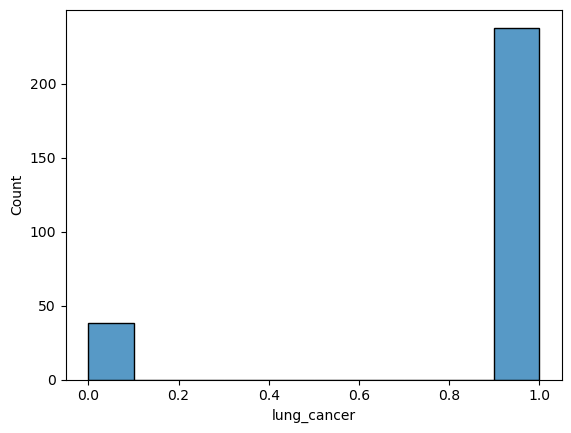

In [42]:
sns.histplot(data = yn_df, x = "lung_cancer");

<AxesSubplot:xlabel='chronic_lung_disease', ylabel='Count'>

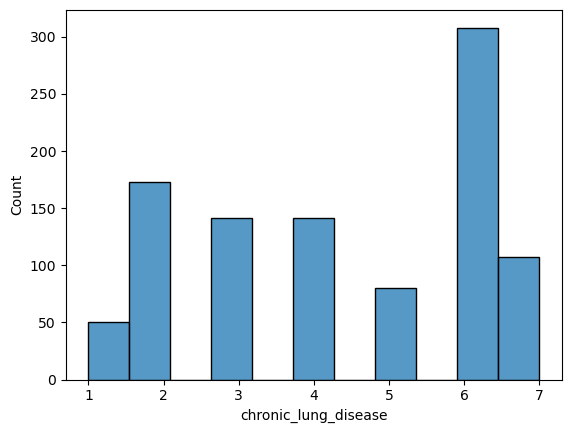

In [43]:
sns.histplot(data = level_df, x = "chronic_lung_disease")

Just taking an initial look at the distributions of whether the individuals have lung cancer or not in `yn_df`, and then the level of lung disease in the `level_df` dataframe.

In [49]:
yn_df_num = yn_df.drop(columns = ["gender", "age"])

<AxesSubplot:>

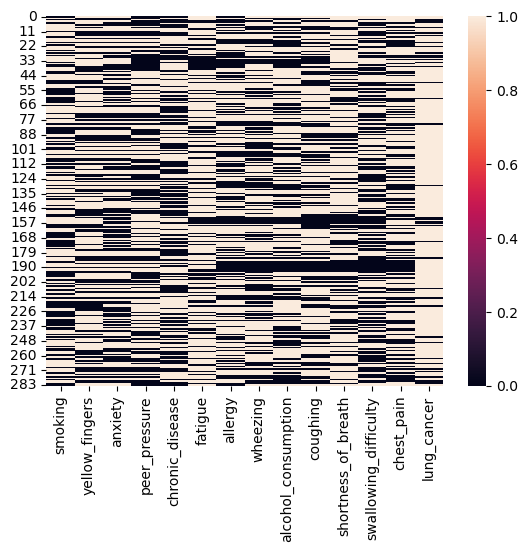

In [50]:
sns.heatmap(yn_df_num)

In [27]:
yn_df.corr()[["lung_cancer"]]

,lung_cancer
age,0.089465
smoking,0.058179
yellow_fingers,0.181339
anxiety,0.144947
peer_pressure,0.186388
chronic_disease,0.110891
fatigue,0.150673
allergy,0.327766
wheezing,0.249300
alcohol_consumption,0.288533


In [30]:
level_df.corr()[["chronic_lung_disease"]]

,chronic_lung_disease
age,0.128952
gender,-0.205061
air_pollution,0.626701
alcohol_use,0.763576
dust_allergy,0.619556
occupational_hazards,0.858284
genetic_risk,0.836231
chronic_lung_disease,1.000000
balanced_diet,0.622632
obesity,0.601754
